# *Final Exam - Project Portion*

### 1. Select Three Meaningful Evaluaiton Metrics
My predictive task is ***Regression*** for **predicting daily pharmacy sales**, so I will apply RMSE, MAE and R^2 to evalueate metrics.       

1. RMSE 
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$
where yi is the actual sales and hat_yi is the predicted sales
* RMSE measures the standard deviation of prdiction errors and penalizers larger errors more heavily. In Pharmacy sales forecasting, large prediction errors can cause stock-outs or overstock, making RMSE a useful metric to evaluate high risk errors.

2. MAE
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
* MAE measures the average magnitude of errors without squaring them, making it less sensitive to outliers. It provides an intuitive measure of typical prediction error, which is easy to interpret for daily inventory management.

3. R^2
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
* R^2 represents the proportion of variance in daily sales explained by the model. Values closer to 1 indicate better fit, while values near indicate poor fit, R^2 provides an overall measure of model performance, complementing RMSE and MAE

### 2. Evaluate Each Model

In [38]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [39]:
# load previously trained models
import joblib

dt_model1 = joblib.load("SavedModels/decision_tree_model1_depth=5.pkl")
dt_model2 = joblib.load("SavedModels/decision_tree_model2_depth=10.pkl")

lr_1 = joblib.load("SavedModels/linear_regression_model1_AllFeatures.pkl")
lr_2 = joblib.load("SavedModels/linear_regression_model2_FeaturesRelatedToTime.pkl")
lr_3 = joblib.load("SavedModels/linear_regression_model3_FeaturesRelatedToR06.pkl")
lr_4 = joblib.load("SavedModels/linear_regression_model4_ApplyTimeandLaggedSalesFeatures.pkl")

In [40]:
# load test data
X_test_dt1 = pd.read_csv("SavedData/X_test_dt1.csv")
y_test_dt1 = pd.read_csv("SavedData/y_test_dt1.csv")

X_test_dt2 = pd.read_csv("SavedData/X_test_dt2.csv")
y_test_dt2 = pd.read_csv("SavedData/y_test_dt2.csv")

X_test_lr1 = pd.read_csv("SavedData/X_test_lr1.csv")
y_test_lr1 = pd.read_csv("SavedData/y_test_lr1.csv")

X_test_lr2 = pd.read_csv("SavedData/X_test_lr2.csv")
y_test_lr2 = pd.read_csv("SavedData/y_test_lr2.csv")
X_test_lr3 = pd.read_csv("SavedData/X_test_lr3.csv")
y_test_lr3 = pd.read_csv("SavedData/y_test_lr3.csv")

X_test_lr4 = pd.read_csv("SavedData/X_test_lr4.csv")
y_test_lr4 = pd.read_csv("SavedData/y_test_lr4.csv")

In [41]:
models_data = {
    "DecisionTree_v1": (dt_model1, X_test_dt1, y_test_dt1),
    "DecisionTree_v2": (dt_model2, X_test_dt2, y_test_dt2),
    "LinearRegression_v1": (lr_1, X_test_lr1, y_test_lr1),
    "LinearRegression_v2": (lr_2, X_test_lr2, y_test_lr2),
    "LinearRegression_v3": (lr_3, X_test_lr3, y_test_lr3),
    "LinearRegression_v4": (lr_4, X_test_lr4, y_test_lr4)
}

In [42]:
results = {"Model": [], "RMSE": [], "MAE": [], "R^2": []}

In [43]:
for name, (model, X_test, y_test) in models_data.items():
    X_test = X_test.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    try:
        y_pred = model.predict(X_test)
        results["Model"].append(name)
        results["RMSE"].append(np.sqrt(mean_squared_error(y_test, y_pred)))
        results["MAE"].append(mean_absolute_error(y_test, y_pred))
        results["R^2"].append(r2_score(y_test, y_pred))
    except Exception as e:
        print(f"Error with model {name}: {e}")
        results["R^2"].append(np.nan)

In [44]:
#dubug
for key, value in results.items():
    print(key, len(value))

Model 6
RMSE 6
MAE 6
R^2 6


In [45]:
#debug
for name, (model, X_test, y_test) in models_data.items():
    print(name, X_test.shape, y_test.shape)

DecisionTree_v1 (422, 12) (422, 1)
DecisionTree_v2 (422, 12) (422, 1)
LinearRegression_v1 (422, 12) (422, 1)
LinearRegression_v2 (422, 5) (422, 1)
LinearRegression_v3 (422, 6) (422, 1)
LinearRegression_v4 (416, 9) (416, 1)


PCA

In [46]:
scaler = joblib.load("SavedModels/scaler.pkl")
pca_final = joblib.load("SavedModels/pca_final.pkl")
pca_model = joblib.load("SavedModels/pca_regression_model.pkl")

In [47]:
X_test_raw = pd.read_csv("SavedData/X_test_pca_raw.csv") # scaled data before PCA
y_test = pd.read_csv("SavedData/y_test_pca_raw.csv")

In [48]:
# normalize the test data using the loaded scaler
X_test_scaled = scaler.transform(X_test_raw)

In [49]:
# PCA transformation
X_test_pca = pca_final.transform(X_test_scaled)

In [50]:
y_pred = pca_model.predict(X_test_pca)

In [51]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [52]:
print(f"PCA Regression Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

PCA Regression Evaluation:
RMSE: 2.0742
MAE: 1.5420
R^2: 0.3098


In [53]:
results["Model"].append("PCA_Regression")
results["RMSE"].append(rmse)
results["MAE"].append(mae)
results["R^2"].append(r2)

In [54]:
results_df = pd.DataFrame(results)
print("Model Evaluation Results:")
display(results_df)

Model Evaluation Results:


,Model,RMSE,MAE,R^2
0,DecisionTree_v1,2.749417,2.113194,-0.099194
1,DecisionTree_v2,3.197650,2.468703,-0.486808
2,LinearRegression_v1,2.217586,1.699001,0.098691
3,LinearRegression_v2,2.243616,1.734510,0.077407
4,LinearRegression_v3,2.243972,1.736503,0.077114
5,LinearRegression_v4,1.920963,1.426363,0.407981
6,PCA_Regression,2.074156,1.542044,0.309791


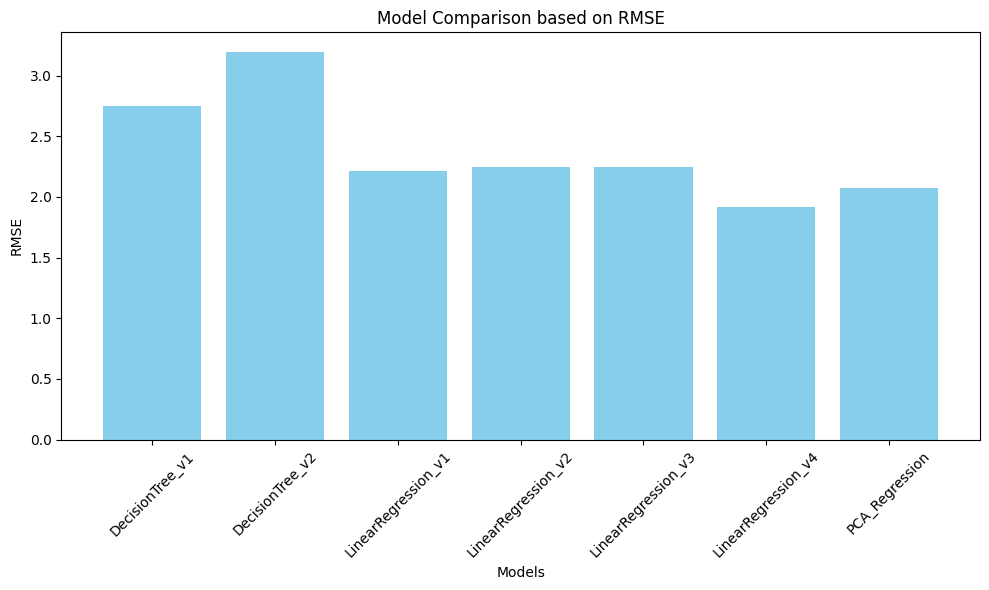

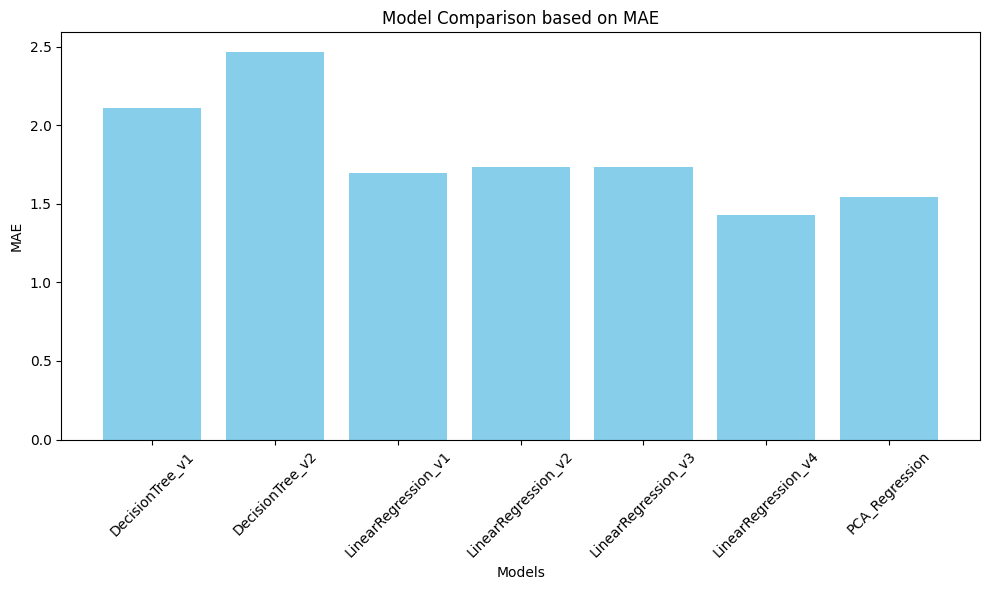

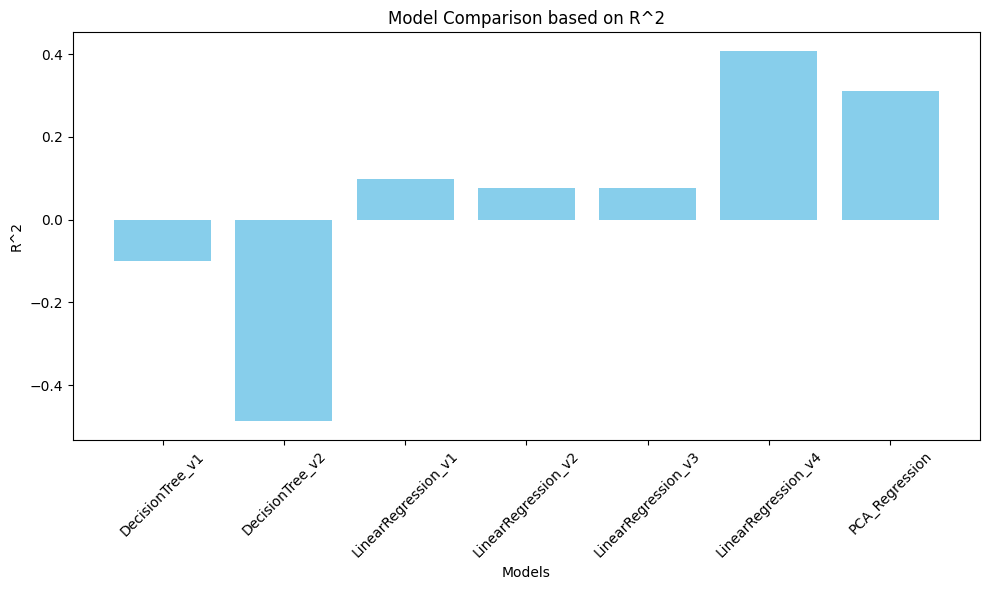

In [55]:
# Visualization
metrics = ["RMSE", "MAE", "R^2"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(results_df["Model"], results_df[metric], color='skyblue')
    plt.title(f'Model Comparison based on {metric}')
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3. Final Project Report -- Pharmacy Daily Sales